# Starbucks Capstone Project

---------

### Data Exploring

In this notebook we will explore the data in order to understand the features and the characteristics of each one of them and how does it affect the decision we need to make.

We will use data visualization to extract relations between different features.

We will also apply some data engineering techniques to help identify any inconsistency in the data and to exclude the unnecessary features.

Then we will use the final features to construct the training data needed for our model. 


### Reading Data

The below lines allow us to import neccessary libraries and load the three json files into pandas dataframes.

In [1]:
#import needed libraries
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from matplotlib.figure import Figure
import os

pd.set_option('display.max_columns', None)

In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
#define a function for data exploration

def data_exploration(data_frame):
    print('Data shape (rows, cols): {}\n'.format(data_frame.shape))
    print('Missing data? {}\n'.format(data_frame.isna().any().any()))
    print('Data description:') 
    display(data_frame.describe())
    print('Data Sample:')
    display(data_frame.sample(10))

### Data Exploration

In [4]:
#Portfolio dataframe
print('1- portfolio Data exploration\n')
data_exploration(portfolio)
print('offer type column unique values:\n{}\n'.format(portfolio['offer_type'].unique()))


1- portfolio Data exploration

Data shape (rows, cols): (10, 6)

Missing data? False

Data description:


,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


Data Sample:


,channels,difficulty,duration,id,offer_type,reward
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10


offer type column unique values:
['bogo' 'informational' 'discount']



In [5]:

#Profile dataframe
print('\n2- Profile Data exploration\n')
data_exploration(profile)
print('gender column unique values:\n{}\n'.format(profile['gender'].unique()))



2- Profile Data exploration

Data shape (rows, cols): (17000, 5)

Missing data? True

Data description:


,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


Data Sample:


,age,became_member_on,gender,id,income
8798,118,20160125,None,43a31114ca23410e9b13e09ef9263cf4,NaN
731,22,20170904,M,91980427ebe04cd7be18426320375cc5,45000.0
7469,86,20160129,F,a42c66f6abfb40df85014739db64faf0,76000.0
9752,48,20160613,F,53b235564f694bcb9a5967ccf699822e,87000.0
3113,56,20161017,M,9365fa9e949b4c52851af3ee091ff6ba,74000.0
2246,82,20180219,M,87fbf08570954a3bbbfa53062a68d232,50000.0
3275,19,20170125,F,c8f6b6d4decd48c1a81b6c8fcf567958,54000.0
569,36,20130730,M,dbb4766b7dd94ca2b83a855312a3ebe9,74000.0
14757,59,20180726,M,3d50b3815c8e4f3b84f46be4d1b64cd3,34000.0
8402,118,20160310,None,5135913f61fa4f15b35c45c01ab9fab3,NaN


gender column unique values:
[None 'F' 'M' 'O']



In [6]:

#transcript dataframe
print('3- transcript Data exploration\n')
data_exploration(transcript)
print('event column unique values:\n{}'.format(transcript['event'].unique()))
display(transcript.event.value_counts()) 


3- transcript Data exploration

Data shape (rows, cols): (306534, 4)

Missing data? False

Data description:


,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


Data Sample:


,event,person,time,value
14801,offer viewed,a9c7d1360f714c21be1ebed72921a6ac,0,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}
249807,offer received,d57fbb84ef4e412e8cdb25f4fbbfe339,576,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
70852,offer viewed,597ce4eaeba1442b97d0f910bba0b5b8,174,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
27643,transaction,345f9431137a49b3963221a55567c4a8,36,{'amount': 24.09}
177413,transaction,f99838e2e07a429a9f331a99d98dceb2,432,{'amount': 11.68}
65775,offer received,8b32527512f641f9a5447ba5a811f3af,168,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
136888,offer completed,2989ffb9c4d0431b8c7f21368b21f804,360,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...
216176,transaction,327cf20d527444aa9a7547f4aec21bb2,504,{'amount': 20.5}
294885,transaction,ba5646a62318454cbf44d04353d9ceda,666,{'amount': 1.15}
283407,offer completed,8d49501a3a90477da47e6633109bf8f9,624,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...


event column unique values:
['offer received' 'offer viewed' 'transaction' 'offer completed']


transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

 #### We can now see that the data that we will use in this project is contained in three files:

**1. Portfolio.json.**
   * Contains the offer ids and meta data about each offer, there are 10 different offers with 6 features:
            a. id (string) - offer id.
            b. offer_type (string) - type of offer (BOGO, discount, informational)
            c. difficulty (int) - minimum required spend to complete an offer
            d. reward (int) - reward given for completing an offer
            e. duration (int) - time for offer to be open, in days (validity)
            f. channels (list of strings) - web, email, mobile, social 
    * No missing rows in the data
            
**2. Profile.json.**
   * Contains the demographic data for 17,000 customers, each with 5 features:
            a. age (int) - age of the customer
            b. became_member_on (int) - date when customer created an app account
            c. gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
            d. id (str) - customer id
            e. income (float) - customer's income
    * Notice that there are some missing records with age=118, gender=none and income =NaN.
    * min income is 30,000 and max is 120,000
    * min age is 18 and max is 118

**3. Transcript.json.**
   * Contains data about the customer transactions and offer status for 306534 events with 4 features:
            a. event (str) - record description ['offer received', 'offer viewed', 'transaction', 'offer completed']
            b. person (str) - customer id
            c. time (int) - time in hours since start of test. The data begins at time t=0
            d. value: (dict of strings) - either an offer id (if the event is an offer) or transaction amount (if the event is transaction)
   * no missing rows in the data
   * some records corrsponds to the customer id with age =118, and since we're removing them from the profile data we need to drop their trx as well

### Data Preprocessing

First, we start with data preprocessing to transform the data into a readable and more clean format. I'll go through each one of the three Dataframes and explain what modifications need to be applied.

The main target is to transform any string values with decimal ones, 1s or 0s.

**1.portfolio**
* Change the `id` column name to `offer_id`.
* Convert the `offer_type` labels to multiple columns (similar to what we did in Plagiarism detector project):
    * bogo
    * discount
    * informational
* Separate the `channels` column into multiple channels and replace with binary labels
* delete the email feature, since all offers are sent via email



In [7]:
#1-rename the 'id' column to 'offer_id'

#deep copy to new variable so I don't modify the original
portfolio_copy = portfolio.copy() 

portfolio_copy.columns=['channels', 'difficulty', 'duration', 'offer_id', 'offer_type', 'reward'] 

In [8]:
#2-create dict for each offer type with numerical value


lb_obj = LabelBinarizer()

#fit_transform returns an array() or matrix which needs to be transformed to a new dataframe 
#.classes_ returns the labels list so we can use them as columns
new_dataframe_profile = pd.DataFrame(lb_obj.fit_transform(portfolio_copy['offer_type']),
                                                   columns=lb_obj.classes_,
                                                   index= portfolio_copy.index)
portfolio_copy=portfolio_copy.join(new_dataframe_profile)
portfolio_copy.pop('offer_type') 


0             bogo
1             bogo
2    informational
3             bogo
4         discount
5         discount
6         discount
7    informational
8             bogo
9         discount
Name: offer_type, dtype: object

In [9]:
#3-use MultiLabelBinarizer library to transform the list of labels to binary labels

mlb_obj = MultiLabelBinarizer()
new_dataframe = pd.DataFrame(mlb_obj.fit_transform(portfolio_copy['channels']),
                                                   columns=mlb_obj.classes_,
                                                   index= portfolio_copy.index)

portfolio_copy=portfolio_copy.join(new_dataframe) #join the new dataframe with the original
portfolio_copy.pop('channels') #remove the channels columns
portfolio_copy.pop('email') 
portfolio_copy.head(10)

,difficulty,duration,offer_id,reward,bogo,discount,informational,mobile,social,web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,1,0,0,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,0,0,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,0,0,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,0,0,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,0,1,0,0,0,1
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,3,0,1,0,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,2,0,1,0,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,0,0,0,1,1,1,0
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,5,1,0,0,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,2,0,1,0,1,0,1


**2.profile**
* Change the `id` column name to `person`.
* remove the missing records with `age`=118, `gender`=none and `income`=NaN.
* convert `age` to categories 10s, 20s, 30s and so on..
* extract the year of join from `the became_member_on` to group by, no need for keeping the day or month
* convert `income` to categories, I will plot a histogram and decide from it how many categories of income should we have
* convert the gender to columns F,M and O


In [10]:

#deep copy to new variable so I don't modify the original
profile_copy = profile.copy() 
#1-rename the 'id' column to 'person'
profile_copy.columns = ['age', 'became_member_on', 'gender', 'person', 'income']



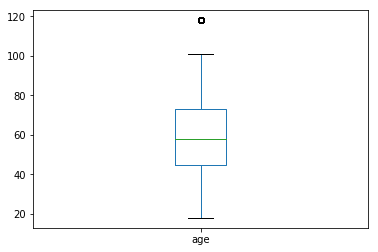

In [11]:
#Explore the age

profile_copy.age.plot.box(grid= False)

In [12]:
#2-remove the missing records with age=118, gender=none and income=NaN.

profile_copy=profile_copy.dropna()

In [13]:
#3-convert age to categories 10s, 20s, 30s and so on..

#define new function to replace each age with lower boundry age
def rounddown(x):
    return int(math.floor(x/10.0))*10 

#replace the age with the new boundry 
profile_copy.age = profile_copy.age.apply(lambda x : rounddown(x))

# transform the updated ages into columns of categories

new_dataframe_profile = pd.DataFrame(lb_obj.fit_transform(profile_copy['age']),
                                                   columns=lb_obj.classes_,
                                                   index= profile_copy.index)
profile_copy=profile_copy.join(new_dataframe_profile)
profile_copy.pop('age') #remove the age column


#rename the columns to ranges
profile_copy.columns = ['became_member_on',           'gender',      'person',
                        'income',                 '10s_age',                 '20s_age',
                       '30s_age',                 '40s_age',                 '50s_age',
                       '60s_age',                 '70s_age',                 '80s_age',
                       '90s_age',                '100s_age']

#### Now let's plot a histogram to explore the income

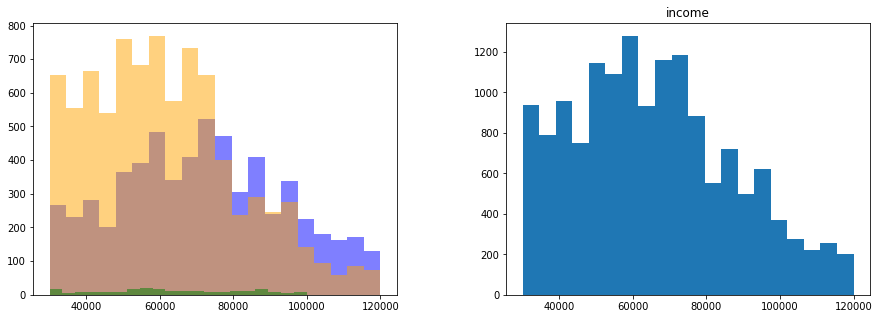

In [14]:
# Group income by gender
import matplotlib.patches as mpatches
income_gender = profile_copy.groupby('gender')

fig,axis = plt.subplots(figsize=(15,5), nrows=1, ncols=2)



income_gender.get_group('F').income.hist(bins=20, ax=axis[0],color= 'blue',alpha=0.5, grid=False)
income_gender.get_group('M').income.hist(bins=20, ax=axis[0],color= 'orange',alpha=0.5, grid=False)
income_gender.get_group('O').income.hist(bins=20, ax=axis[0],color= 'green',alpha=0.5, grid=False)


profile_copy.hist(column='income', bins=20, ax=axis[1], grid=False)
plt.show()

#### From the histogram we can conclude:
* Men's income is concentrated between 30K and 80K
* Women have higher % of having an income >=80K, which may impact the offer reposnse rate 
* From the right histogram, I think we can separate the income to categories each with width of 20K, starting with less than 50K to less than 130K

In [15]:
#4- replace the income with binary labels represnting the income range
#construct income ranges 
income_range=[]    
step =20000
start = int(profile_copy.income.min()) + step
stop =  int(profile_copy.income.max()) + step

for i in range(start,stop,step):
    income_range.append(i)

#construct a function to replace each income with the new range between 50,000 and 130,000
def cal_income_range(income,income_range, step):
    res =0
    for x in income_range:
        if income <= x:
            res = x
            break
    return res
   
#replace the income with the new categories 
profile_copy.income = profile_copy.income.apply(lambda x : cal_income_range(x,income_range, step))   

In [16]:
# transform the updated ages into columns


new_dataframe_profile = pd.DataFrame(lb_obj.fit_transform(profile_copy['income']),
                                                   columns=lb_obj.classes_,
                                                   index= profile_copy.index)
profile_copy=profile_copy.join(new_dataframe_profile)

profile_copy.pop('income') #remove the income columns
profile_copy.columns = ['became_member_on',           'gender',      'person',
                '10s_age',          '20s_age',
                '30s_age',          '40s_age',          '50s_age',
                '60s_age',          '70s_age',          '80s_age',
                '90s_age',         '100s_age',              'income<=50000',
                    'income<=70000',              'income<=90000',             'income<=110000',
                   'income<=130000']

In [17]:
#5- extract the year from become member on into  and drop the month and day

profile_copy.became_member_on = profile_copy.became_member_on.astype(str)
profile_copy['joined_year'] = profile_copy.became_member_on.str[0:4]
profile_copy.pop('became_member_on') #remove the became_member_on columns
profile_copy.head(10)


,gender,person,10s_age,20s_age,30s_age,40s_age,50s_age,60s_age,70s_age,80s_age,90s_age,100s_age,income<=50000,income<=70000,income<=90000,income<=110000,income<=130000,joined_year
1,F,0610b486422d4921ae7d2bf64640c50b,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2017
3,F,78afa995795e4d85b5d9ceeca43f5fef,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2017
5,M,e2127556f4f64592b11af22de27a7932,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2018
8,M,389bc3fa690240e798340f5a15918d5c,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2018
12,M,2eeac8d8feae4a8cad5a6af0499a211d,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2017
13,F,aa4862eba776480b8bb9c68455b8c2e1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2017
14,M,e12aeaf2d47d42479ea1c4ac3d8286c6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2014
15,F,31dda685af34476cad5bc968bdb01c53,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2016
16,M,62cf5e10845442329191fc246e7bcea3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2014
18,M,6445de3b47274c759400cd68131d91b4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2017


In [18]:
new_dataframe_profile = pd.DataFrame(lb_obj.fit_transform(profile_copy['gender']),
                                                   columns=lb_obj.classes_,
                                                   index= profile_copy.index)
profile_copy=profile_copy.join(new_dataframe_profile)

profile_copy.pop('gender') #remove the income columns

profile_copy.head(10)

,person,10s_age,20s_age,30s_age,40s_age,50s_age,60s_age,70s_age,80s_age,90s_age,100s_age,income<=50000,income<=70000,income<=90000,income<=110000,income<=130000,joined_year,F,M,O
1,0610b486422d4921ae7d2bf64640c50b,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2017,1,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2017,1,0,0
5,e2127556f4f64592b11af22de27a7932,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2018,0,1,0
8,389bc3fa690240e798340f5a15918d5c,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2018,0,1,0
12,2eeac8d8feae4a8cad5a6af0499a211d,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2017,0,1,0
13,aa4862eba776480b8bb9c68455b8c2e1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2017,1,0,0
14,e12aeaf2d47d42479ea1c4ac3d8286c6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2014,0,1,0
15,31dda685af34476cad5bc968bdb01c53,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2016,1,0,0
16,62cf5e10845442329191fc246e7bcea3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2014,0,1,0
18,6445de3b47274c759400cd68131d91b4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2017,0,1,0



**3.transcript**
* separate the value column data into multiple columns
* one hot encoding for the event column
* group the responses or number of times the offer was received, viewed and completed per customer in one row --> since our problem is to identify which promo to send to which customer, we need to represent the customer responses to offers more clear than it is in the transcript data.We need to have one record per "customer and offer" that concludes whether the customer responded to that specific offer or not.




In [19]:
#1st deep copy to new variable so I don't modify the original
transcript_copy = transcript.copy() 

# 1-separate the "value" column data into multiple columns and append it to the transcript copy
transcript_copy = transcript_copy.join(pd.DataFrame.from_records(transcript_copy.pop('value')))
transcript_copy.offer_id.update(transcript_copy.pop('offer id'))


# 2- One hot encoding for events column

new_dataframe_profile = pd.DataFrame(lb_obj.fit_transform(transcript_copy['event']),
                                                   columns=lb_obj.classes_,
                                                   index= transcript_copy.index)
transcript_copy=transcript_copy.join(new_dataframe_profile)


transcript_copy.pop('event')
transcript_copy.head(10)

,person,time,amount,offer_id,reward,offer completed,offer received,offer viewed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,0,1,0,0
5,389bc3fa690240e798340f5a15918d5c,0,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,0,1,0,0
6,c4863c7985cf408faee930f111475da3,0,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,0,1,0,0
7,2eeac8d8feae4a8cad5a6af0499a211d,0,NaN,3f207df678b143eea3cee63160fa8bed,NaN,0,1,0,0
8,aa4862eba776480b8bb9c68455b8c2e1,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0,1,0,0
9,31dda685af34476cad5bc968bdb01c53,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0,1,0,0


In [20]:
#Aggregate customer response for each offer 
transcript_copy = transcript_copy.groupby(['person','offer_id'], as_index=False).sum()


I will create a new column to indicate whether this offer was successfully responded to or not, 1 for success and 0 for not.

In [21]:
#define new function to replace with responded or not
def responded_func(x):
    if x == 0:
        return 0
    else: 
        return 1

#replace the age with the new boundry 
transcript_copy['offer completed'] = transcript_copy['offer completed']\
.apply(lambda x : responded_func(x))

transcript_copy.columns = ['person','offer_id','time', 'amount', 'reward',\
                           'offer_responded_to', 'offer received',\
                           'offer viewed', 'transaction']

#we can remove the amount column as it's not a customer nor a profile feature

transcript_copy.pop('amount')
transcript_copy.pop('reward')

#remove the NAN
transcript_copy=transcript_copy.dropna()


transcript_copy.sample(10)

,person,offer_id,time,offer_responded_to,offer received,offer viewed,transaction
57071,e648d51c487040748182aad1201ce7a3,5a8bc65990b245e5a138643cd4eb9837,1158,0,2,2,0
17765,47d694f8d8ad41b69fc1b6dd2fe2a5ce,f19421c1d4aa40978ebb69ca19b0e20d,1266,1,1,1,0
42739,ab37a7049b4747e1840cfcc298aca0a4,3f207df678b143eea3cee63160fa8bed,408,0,1,0,0
42658,ab11f24759c04a0facd349956aea364f,fafdcd668e3743c1bb461111dcafc2a4,678,0,1,1,0
29785,78f6ac1eb6c240368c54284c682e4224,2906b810c7d4411798c6938adc9daaa5,408,0,1,1,0
35589,8f4364144e0548f885b390f28aabe2b8,2906b810c7d4411798c6938adc9daaa5,168,0,1,0,0
11156,2e60dab0d4ce46faa0cd690ac315c440,3f207df678b143eea3cee63160fa8bed,6,0,1,1,0
22983,5d26e4cc7a9c47af96abca48de7745d9,ae264e3637204a6fb9bb56bc8210ddfd,1020,0,1,1,0
45710,b787ee3c299e4b0cb2d536c7d2302584,ae264e3637204a6fb9bb56bc8210ddfd,678,0,1,1,0
1711,073e3ef64e344bc8891732b558582492,4d5c57ea9a6940dd891ad53e9dbe8da0,528,1,1,1,0


### Let's join all data sets together and take a more generalized look at the features.

In [22]:
offer_data = pd.merge(transcript_copy, portfolio_copy, on='offer_id', how='inner')
offer_data = pd.merge(offer_data, profile_copy, on='person', how='inner')
offer_data.head(10)

,person,offer_id,time,offer_responded_to,offer received,offer viewed,transaction,difficulty,duration,reward,bogo,discount,informational,mobile,social,web,10s_age,20s_age,30s_age,40s_age,50s_age,60s_age,70s_age,80s_age,90s_age,100s_age,income<=50000,income<=70000,income<=90000,income<=110000,income<=130000,joined_year,F,M,O
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1152,1,1,0,0,10,7,2,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2017,0,1,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,708,0,1,1,0,0,4,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2017,0,1,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,360,0,1,1,0,0,3,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2017,0,1,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1278,1,1,1,0,5,5,5,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2017,0,1,0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1572,1,1,1,0,10,10,2,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2017,0,1,0
5,00426fe3ffde4c6b9cb9ad6d077a13ea,2906b810c7d4411798c6938adc9daaa5,984,0,2,0,0,10,7,2,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2016,1,0,0
6,00426fe3ffde4c6b9cb9ad6d077a13ea,5a8bc65990b245e5a138643cd4eb9837,36,0,1,1,0,0,3,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2016,1,0,0
7,00426fe3ffde4c6b9cb9ad6d077a13ea,fafdcd668e3743c1bb461111dcafc2a4,612,1,1,1,0,10,10,2,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2016,1,0,0
8,00426fe3ffde4c6b9cb9ad6d077a13ea,0b1e1539f2cc45b7b9fa7c272da2e1d7,336,0,1,0,0,20,10,5,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2016,1,0,0
9,005500a7188546ff8a767329a2f7c76a,2906b810c7d4411798c6938adc9daaa5,408,0,1,0,0,10,7,2,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2017,0,1,0


### Now we have finished all the data cleaning and merging, we can make final check and combine the needed features, apply some features scaling and check the correlation between the features.. but before this I will filter out the below features:

* We don't need the offer received, offer viewed and transactions features anymore as we only care if the offer was responded to or not.
* remove the person column as the model will work on the customer info and it doesn't really care about a specific customer.
* informational offers can only be viewed, so it will impact the model if one type of offers always had the same response from the customer.

In [23]:
offer_data.pop('offer_id')
offer_data.pop('offer received')
offer_data.pop('offer viewed')
offer_data.pop('transaction')
offer_data.pop('time')
offer_data.pop('person')
offer_data.pop('informational')
offer_data.head(10)

,offer_responded_to,difficulty,duration,reward,bogo,discount,mobile,social,web,10s_age,20s_age,30s_age,40s_age,50s_age,60s_age,70s_age,80s_age,90s_age,100s_age,income<=50000,income<=70000,income<=90000,income<=110000,income<=130000,joined_year,F,M,O
0,1,10,7,2,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2017,0,1,0
1,0,0,4,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2017,0,1,0
2,0,0,3,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2017,0,1,0
3,1,5,5,5,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2017,0,1,0
4,1,10,10,2,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2017,0,1,0
5,0,10,7,2,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2016,1,0,0
6,0,0,3,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2016,1,0,0
7,1,10,10,2,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2016,1,0,0
8,0,20,10,5,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2016,1,0,0
9,0,10,7,2,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2017,0,1,0


In [24]:
offer_data = offer_data.reset_index(drop=True)

In [25]:
#re-ordering the columns and renaming the last column to label 
offer_data= offer_data[['difficulty', 'duration', 'reward',
       'bogo', 'discount', 'mobile', 'social', 'web', '10s_age', '20s_age',
       '30s_age', '40s_age', '50s_age', '60s_age', '70s_age', '80s_age',
       '90s_age', '100s_age', 'income<=50000', 'income<=70000',
       'income<=90000', 'income<=110000', 'income<=130000', 'joined_year', 'F',
       'M', 'O', 'offer_responded_to']]

offer_data.columns = ['difficulty', 'duration', 'reward',
       'bogo', 'discount', 'mobile', 'social', 'web', '10s_age', '20s_age',
       '30s_age', '40s_age', '50s_age', '60s_age', '70s_age', '80s_age',
       '90s_age', '100s_age', 'income<=50000', 'income<=70000',
       'income<=90000', 'income<=110000', 'income<=130000', 'joined_year', 'F',
       'M', 'O', 'label']

### Preparing for training (Scaling)

To prepare the data we will need to scale some features such as difficulty, duration and reward as we don't want them to impact the training as they have large values than the other features we created of 0 and 1.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Text(0.5, 0, 'scaled value')

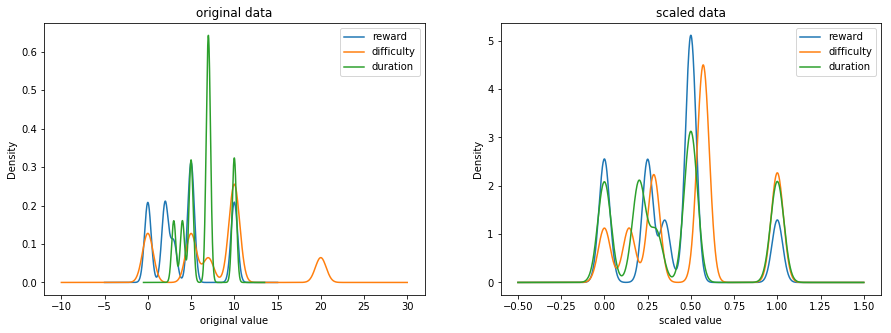

In [26]:
#scaling the features
scaling, axis = plt.subplots(figsize=(15,5), nrows=1, ncols=2)

scaling_data = offer_data[['reward','difficulty','duration']]
scaling_data.plot.density(ax=axis[0])
axis[0].set_title('original data')
axis[0].set_xlabel('original value')

from sklearn import preprocessing
minmax_scaler = preprocessing.MinMaxScaler()


offer_data[['reward','difficulty','duration']] = minmax_scaler\
.fit_transform(offer_data[['difficulty', 'duration', 'reward' ]])

scaled_data = offer_data[['reward','difficulty','duration']]
scaled_data.plot.density(ax=axis[1])
axis[1].set_title('scaled data')
axis[1].set_xlabel('scaled value')

from the above we can see now that the values' ranges are close to each other and to other features.

#### Now let's take a look on the correlation between the features we chose, to make sure we excluded all the highliy correlated features:

In [27]:
#correlation matrix
offer_data.corr().abs()

,difficulty,duration,reward,bogo,discount,mobile,social,web,10s_age,20s_age,30s_age,40s_age,50s_age,60s_age,70s_age,80s_age,90s_age,100s_age,income<=50000,income<=70000,income<=90000,income<=110000,income<=130000,F,M,O,label
difficulty,1.000000,0.160711,0.808800,0.185439,0.741807,0.531189,0.185570,0.340687,0.010037,0.002133,0.005289,0.001768,0.003343,0.001141,0.003072,0.004529,0.002328,0.001009,0.002909,0.005561,0.006193,0.002701,0.002560,0.002683,0.003067,0.001670,0.368874
duration,0.160711,1.000000,0.465200,0.792408,0.287798,0.078430,0.287354,0.120237,0.002433,0.001797,0.000599,0.006186,0.000531,0.001517,0.004112,0.001666,0.000998,0.007182,0.004514,0.006008,0.001583,0.002650,0.005801,0.001866,0.002939,0.004562,0.224087
reward,0.808800,0.465200,1.000000,0.030666,0.598324,0.742775,0.156038,0.243598,0.008070,0.003872,0.003231,0.000590,0.004404,0.001535,0.004405,0.002685,0.000849,0.001938,0.004190,0.007180,0.006109,0.003237,0.000232,0.000947,0.002022,0.004556,0.292102
bogo,0.185439,0.792408,0.030666,1.000000,0.666752,0.273687,0.249026,0.104960,0.000371,0.000547,0.001628,0.006785,0.001438,0.000995,0.001094,0.002614,0.002296,0.005173,0.004028,0.003135,0.001965,0.002033,0.006814,0.001136,0.001447,0.001334,0.150616
discount,0.741807,0.287798,0.598324,0.666752,1.000000,0.410478,0.166076,0.409560,0.004959,0.005512,0.003355,0.005670,0.001107,0.002829,0.003464,0.000722,0.003394,0.003810,0.001330,0.001126,0.004968,0.000192,0.006111,0.001927,0.002293,0.001583,0.262400
mobile,0.531189,0.078430,0.742775,0.273687,0.410478,1.000000,0.410246,0.168115,0.007072,0.000689,0.002341,0.002636,0.007569,0.005922,0.001653,0.000626,0.001052,0.003621,0.003156,0.005149,0.005589,0.002877,0.002505,0.002808,0.002696,0.000418,0.013992
social,0.185570,0.287354,0.156038,0.249026,0.166076,0.410246,1.000000,0.409792,0.003436,0.004195,0.004985,0.002534,0.008766,0.006384,0.003508,0.005347,0.000619,0.000398,0.004724,0.004022,0.002064,0.002080,0.002383,0.002787,0.003429,0.002766,0.092066
web,0.340687,0.120237,0.243598,0.104960,0.409560,0.168115,0.409792,1.000000,0.000428,0.002925,0.000207,0.000743,0.000874,0.000791,0.002617,0.003834,0.001106,0.005314,0.001154,0.001910,0.001736,0.003985,0.005062,0.002230,0.002740,0.002196,0.222560
10s_age,0.010037,0.002433,0.008070,0.000371,0.004959,0.007072,0.003436,0.000428,1.000000,0.037842,0.040114,0.050448,0.066136,0.059282,0.043472,0.028805,0.015575,0.003858,0.061455,0.020198,0.045426,0.042928,0.021165,0.046804,0.049912,0.014019,0.032544
20s_age,0.002133,0.001797,0.003872,0.000547,0.005512,0.000689,0.004195,0.002925,0.037842,1.000000,0.109072,0.137171,0.179827,0.161191,0.118203,0.078323,0.042349,0.010491,0.169842,0.044606,0.114961,0.116724,0.057549,0.079399,0.081144,0.008897,0.066984


The highest correlation is between the reward and difficulty = 0.8, which makes sense as the more the difficulty increased, the higher the reward the customer will get. However it's acceptable to have.

### Preparing for training (features and output separation)

In [28]:
#splitting the input and outpur
X_data = offer_data.iloc[:, :-1].values #all until last column
Y_data = offer_data.iloc[:, -1].values #only last column

#I will split the data as: 80% training, 20% testing
features_train, features_test, output_train, output_test = train_test_split(X_data,\
                                                                            Y_data,\
                                                                            test_size=0.2,\
                                                                            random_state=1)
display("Input train shape:", features_train.shape)
display("Input test shape:", features_test.shape)


'Input train shape:'

(44177, 27)

'Input test shape:'

(11045, 27)

### Creating the data files and uploading the data 

We will create a function to create csv files, each csv file will have the output label in the first column and the fetaures in the rest if the columns.

In [29]:
def create_csvfile(x, y, filename, directory):
    # make data directory, if it does not exist
    if not os.path.exists(directory):
        os.makedirs(directory)

    pd.concat([pd.DataFrame(x),pd.DataFrame(y)],axis=1).dropna()\
    .to_csv(os.path.join(directory, filename), header=False,index=False)
    
    print('Path created: '+str(directory)+'/'+str(filename))
    


In [30]:
directory = 'uploaded_data'

create_csvfile(features_train, output_train, filename='train.csv', directory=directory)
create_csvfile(features_test, output_test, filename='test.csv', directory=directory)

Path created: uploaded_data/train.csv
Path created: uploaded_data/test.csv
